In [1]:
library(Seurat)

library(dplyr)
library(glue)
library(ggplot2)
library(patchwork)
library(cowplot)
library(stringr)
library(tidyr)
library("dplyr")
library(velocyto.R)
library(stringr)
library(SeuratWrappers)
load("6_18.RData")

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'glue'


The following object is masked from 'package:dplyr':

    collapse



Attaching package: 'cowplot'


The following object is masked from 'package:patchwork':

    align_plots


Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack




In [2]:
library(DAseq)


In [3]:
head(merged_obj,n=2)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,percent.mt,RNA.weight,ADT.weight,wsnn_res.1,seurat_clusters,Blood_pred,BM_pred,Bone_pred,id
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
mWT_AAACCCAAGTGATCGG-1,mWT,3787,1690,103,7,5.307631,0.1297299,0.8702701,9,9,9,9,9,reference
mWT_AAACCCACAAACCATC-1,mWT,13420,3991,284,8,3.204173,0.0408018,0.9591982,3,3,3,Hematopoietic Stem Cell,3,reference


In [15]:
tail(merged_obj)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,percent.mt,RNA.weight,ADT.weight,wsnn_res.1,seurat_clusters,Blood_pred,BM_pred,Bone_pred,id,new_name
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>
mNFIXko_TTTGGTTGTCTTGCTC-1,mNFIXko,6319,2424,83,8,3.307485,0.124806775,0.8751932,1,1,1,1,1,reference,mNFIXko_1
mNFIXko_TTTGGTTGTGGCAACA-1,mNFIXko,11909,3372,134,8,2.645058,0.091901015,0.9080990,1,1,1,1,1,reference,mNFIXko_1
mNFIXko_TTTGGTTTCAACACCA-1,mNFIXko,7124,2548,84,7,4.239191,0.415626759,0.5843732,5,5,5,Megakaryocyte,5,reference,mNFIXko_5
mNFIXko_TTTGGTTTCGATACGT-1,mNFIXko,4842,1997,84,8,3.283767,0.389039448,0.6109606,3,3,3,Hematopoietic Stem Cell,3,reference,mNFIXko_3
mNFIXko_TTTGGTTTCTCCAAGA-1,mNFIXko,6518,2319,42,7,4.065664,0.002965497,0.9970345,9,9,9,9,9,reference,mNFIXko_9
mNFIXko_TTTGTTGCAAGTGGGT-1,mNFIXko,20980,4516,126,8,2.936130,0.300945547,0.6990545,4,4,Natural Killer Cell,Stage I Neutrophil,Granulocyte,reference,mNFIXko_4
mNFIXko_TTTGTTGCACGCTATA-1,mNFIXko,4128,1800,248,8,4.215116,0.276211692,0.7237883,3,3,3,Hematopoietic Stem Cell,3,reference,mNFIXko_3
mNFIXko_TTTGTTGCAGTAACCT-1,mNFIXko,9025,3086,58,8,3.235457,0.378029126,0.6219709,6,6,6,Stage I Neutrophil,6,reference,mNFIXko_6
mNFIXko_TTTGTTGCATCGGAGA-1,mNFIXko,5738,2165,145,8,4.444057,0.206763377,0.7932366,9,9,9,9,9,reference,mNFIXko_9


In [8]:
merged_obj$new_name <- paste(merged_obj$orig.ident,merged_obj$seurat_clusters,sep="_")

In [9]:
head(merged_obj,n=2)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,percent.mt,RNA.weight,ADT.weight,wsnn_res.1,seurat_clusters,Blood_pred,BM_pred,Bone_pred,id,new_name
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>
mWT_AAACCCAAGTGATCGG-1,mWT,3787,1690,103,7,5.307631,0.1297299,0.8702701,9,9,9,9,9,reference,mWT_9
mWT_AAACCCACAAACCATC-1,mWT,13420,3991,284,8,3.204173,0.0408018,0.9591982,3,3,3,Hematopoietic Stem Cell,3,reference,mWT_3


In [10]:
pca_embedding <- merged_obj@reductions$pca@cell.embeddings
tsne_embedding <- merged_obj@reductions$wnn.umap@cell.embeddings
cell_labels = merged_obj@meta.data$new_name


In [12]:
unique(X.label.info[X.label.info$condition == "R", "label"])

[1] "Pre_P1"    "Post_P1"   "Post_P4"   "Post_P5_2" "Pre_P7"    "Post_P7"  
 [7] "Pre_P8"    "Post_P8"   "Post_P17"  "Post_P19"  "Post_P21"  "Pre_P24"  
[13] "Pre_P26"   "Pre_P28"   "Pre_P29"   "Pre_P33"   "Pre_P35"

In [16]:
label1 = unique(subset(x = merged_obj, subset = orig.ident == "mWT")$new_name)
label2 = unique(subset(x = merged_obj, subset = orig.ident == "mNFIXko")$new_name)

Calculating DA score vector.
Running GLM.
Test on random labels.
Setting thresholds based on permutation


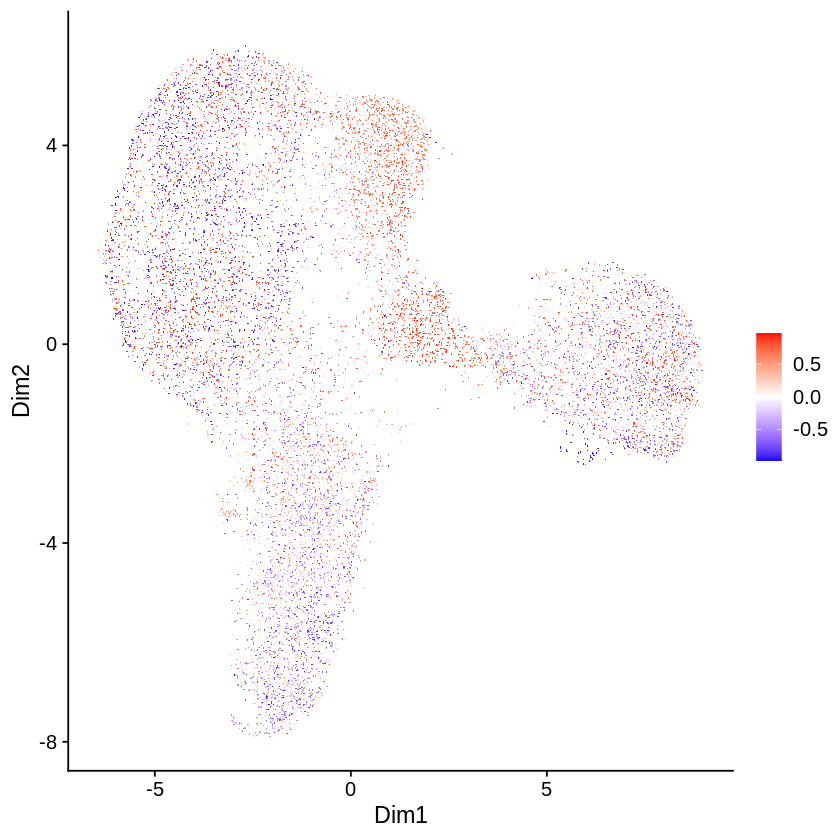

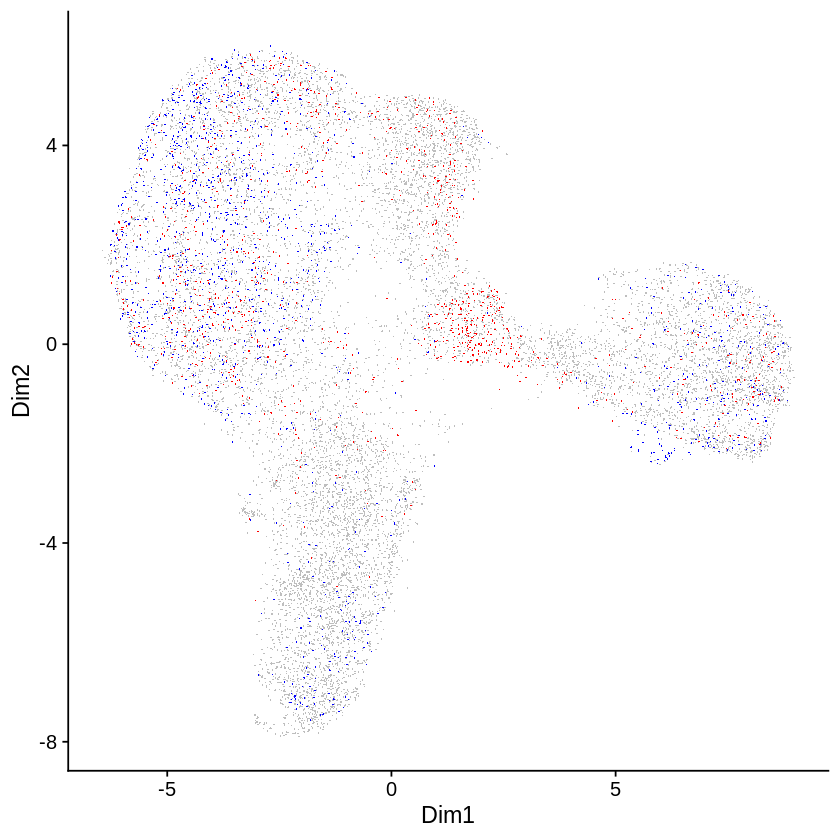

In [17]:



da_cells <- getDAcells(
  X = pca_embedding, 
  cell.labels = cell_labels, 
  labels.1 = label1, 
  labels.2 = label2, 
  k.vector = seq(50, 500, 50), 
  plot.embedding = tsne_embedding
)

da_cells <- updateDAcells(
  X = da_cells, pred.thres = c(-0.8,0.8), 
  do.plot = T, plot.embedding = tsne_embedding, size = 0.1
)

da_cells$pred.plot
da_cells$da.cells.plot


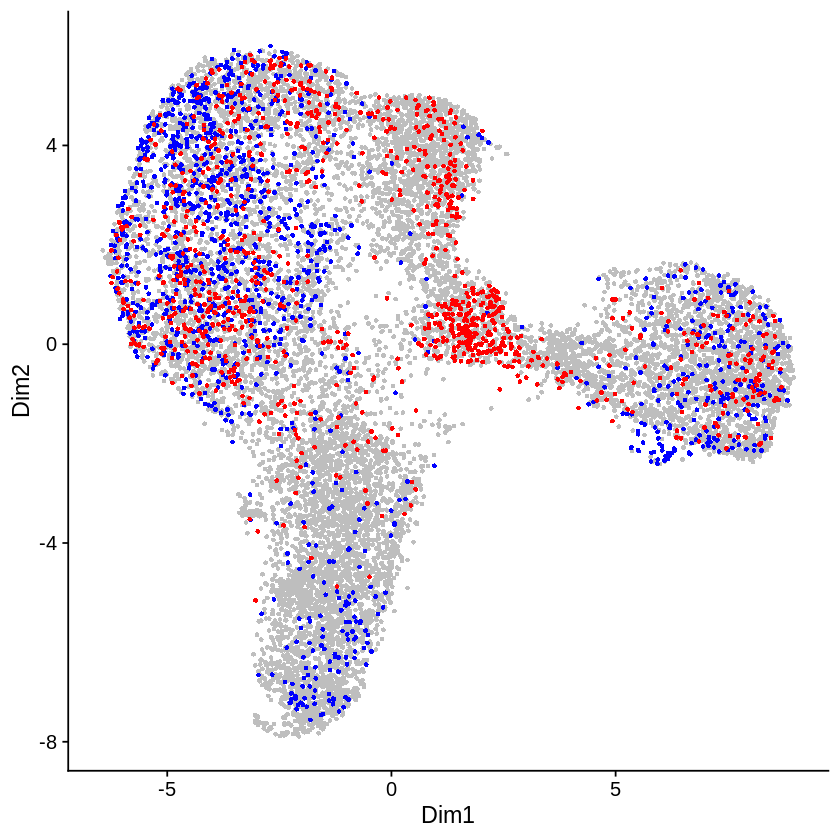

In [26]:
da_cells <- updateDAcells(
  X = da_cells, pred.thres = c(-0.8,0.8), 
  do.plot = T, plot.embedding = tsne_embedding, size = 1
)
da_cells$da.cells.plot


In [24]:
?updateDAcells

updateDAcells {DAseq},R Documentation
X,output from getDAcells()
pred.thres,"length-2 vector, top and bottom threshold on DA measure, default NULL, select significant DA cells based on permutation"
force.thres,"a logical value to indicate whether to forcefully use pred.thres without considering significance, default False"
alpha,set this parameter to not NULL to rerun Logistic regression
do.plot,"a logical value to indicate whether to return ggplot objects showing the results, default True"
plot.embedding,"size N-by-2 matrix, 2D embedding for the cells"
size,"cell size to use in the plot, default 0.5"


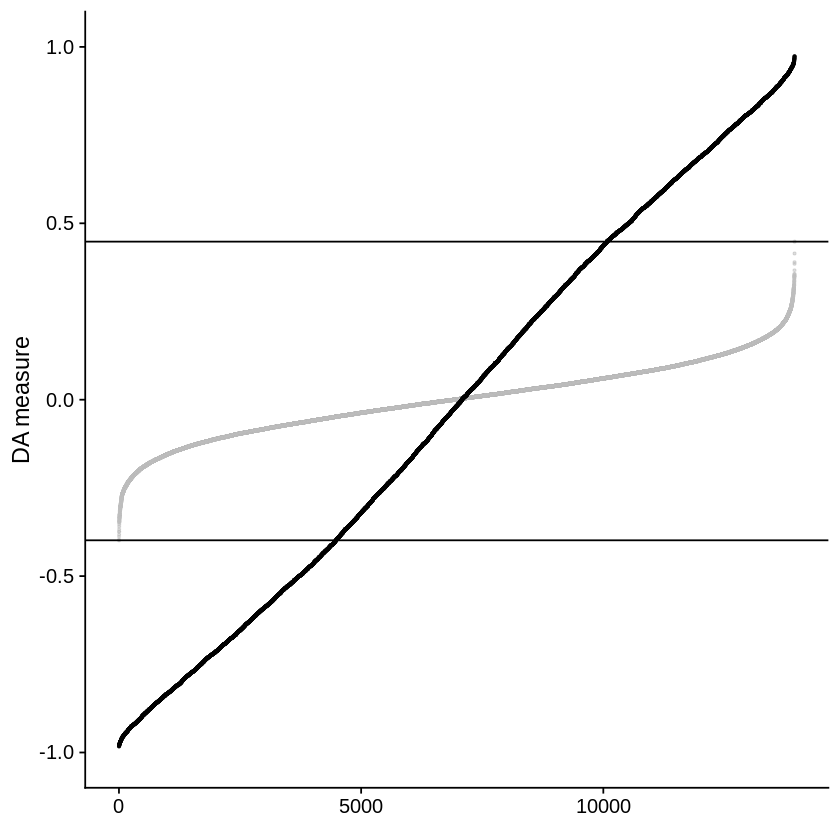

In [18]:
da_cells$rand.plot


Warning message:
"The following arguments are not used: row.names"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"The following arguments are not used: row.names"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"The following arguments are not used: row.names"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


Removing 2 DA regions with cells < 50.


Warning message in wilcox.test.default(x = idx.label.ratio[labels.2], idx.label.ratio[labels.1]):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = idx.label.ratio[labels.2], idx.label.ratio[labels.1]):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = idx.label.ratio[labels.2], idx.label.ratio[labels.1]):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = idx.label.ratio[labels.2], idx.label.ratio[labels.1]):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = idx.label.ratio[labels.2], idx.label.ratio[labels.1]):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = idx.label.ratio[labels.2], idx.label.ratio[labels.1]):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(x = idx.label.ratio[labels.2], idx.label.ratio[labels.1]):
"cannot compute exact p-value with ties"


DA.score,pval.wilcoxon,pval.ttest
0.9655116,0.020132277,0.01600651
0.8492669,0.003112802,0.21038372
0.8980009,0.010077426,0.17475584
0.9828380,0.267951816,0.16690370
-0.9313007,0.013100512,0.02572040
-0.9216048,0.033793729,0.04837914
-0.9159798,0.010186571,0.21723165


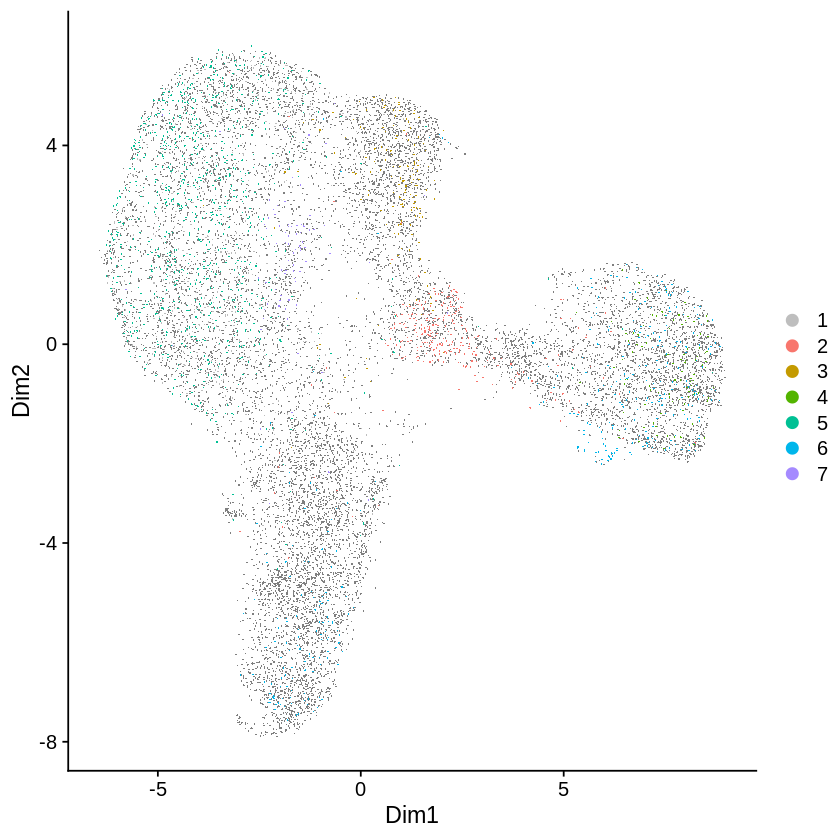

In [21]:
da_regions <- getDAregion(
  X = pca_embedding, 
  da.cells = da_cells, 
  cell.labels = cell_labels,
  labels.1 = label1, 
  labels.2 = label2, 
  resolution = 0.01, min.cell = 50, 
  plot.embedding = tsne_embedding, size = 0.1
)



da_regions$da.region.plot
da_regions$DA.stat

n_da <- length(unique(da_regions$da.region.label)) - 1



In [23]:
python2use="/home/yli11/.conda/envs/captureC/bin/python"
STG_markers <- STGmarkerFinder(
  X = pca_embedding,
  da.regions = da_regions,
  lambda = 1.5, n.runs = 5, return.model = T,python.use = python2use
)

ERROR: Error in use_python(python = python.use, required = T): failed to initialize requested version of Python
